In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

Step 1: Data Preparation

In [2]:
# Pull in cryto file and inspect
file_path = 'Resources/crypto_data.csv'

In [3]:
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
crypto_df.info

<bound method DataFrame.info of             CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
42           42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
365          365Coin       X11       True   PoW/PoS              NaN   
404          404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
611        SixEleven   SHA-256       True       PoW              NaN   
808              808   SHA-256       True   PoW/PoS     0.000000e+00   
...              ...       ...        ...       ...              ...   
XBC      BitcoinPlus    Scrypt       True       PoS     1.283270e+05   
DVTC      DivotyCoin    Scrypt      False   PoW/PoS     2.149121e+07   
GIOT     Giotto Coin    Scrypt      False   PoW/PoS              NaN   
OPSC  OpenSourceCoin   SHA-256      False   PoW/PoS              NaN   
PUNK       SteamPunk       PoS      False       PoS              NaN   

     TotalCoinSupply  
42                42  
365       2300000000  
404        532000000  
611        

In [5]:
# Remove all crypto not being traded
crypto_df = crypto_df[crypto_df.IsTrading != 0]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   IsTrading        1144 non-null   bool   
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 54.7+ KB


In [7]:
# Remove IsTrading column
crypto_df = crypto_df.drop(columns="IsTrading")
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
# Remove rows with null values
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [9]:
crypto_df = crypto_df.dropna()
crypto_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Filter for crypto only having coins mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] != 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [11]:
# Save cryto names into a separate df before removing
crypto_names_df = pd.DataFrame(crypto_df.CoinName)
crypto_names_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [12]:
# Remove CoinName column
crypto_df = crypto_df.drop(columns="CoinName")
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [13]:
# convert text columns Algorithm and ProofType to numeric
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 42 to XBC
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   533 non-null    float64
 1   TotalCoinSupply                   533 non-null    object 
 2   Algorithm_1GB AES Pattern Search  533 non-null    uint8  
 3   Algorithm_536                     533 non-null    uint8  
 4   Algorithm_Argon2d                 533 non-null    uint8  
 5   Algorithm_BLAKE256                533 non-null    uint8  
 6   Algorithm_Blake                   533 non-null    uint8  
 7   Algorithm_Blake2S                 533 non-null    uint8  
 8   Algorithm_Blake2b                 533 non-null    uint8  
 9   Algorithm_C11                     533 non-null    uint8  
 10  Algorithm_Cloverhash              533 non-null    uint8  
 11  Algorithm_Counterparty            533 non-null    uint8  
 12  Algorithm_C

In [14]:
# Standardize data with scaling
scaler = StandardScaler()
scaled_crypto_df = scaler.fit_transform(X)
scaled_crypto_df[0:5]

array([[-0.11674788, -0.15286468, -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.07523548, -0.0433555 , -0.06137164, -0.06137164,
        -0.0433555 , -0.0433555 , -0.19226279, -0.06137164, -0.09731237,
        -0.0433555 , -0.11536024, -0.07523548, -0.0433555 , -0.0433555 ,
        -0.15176505, -0.0433555 , -0.13105561, -0.0433555 , -0.0433555 ,
        -0.08695652, -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.0433555 , -0.08695652, -0.08695652, -0.08695652,
        -0.0433555 , -0.13105561, -0.13827675, -0.13827675, -0.0433555 ,
        -0.06137164, -0.0433555 , -0.07523548, -0.1815096 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.07523548, -0.15811388, -0.3145935 ,
        -0.0433555 , -0.08695652, -0.07523548, -0.06137164, -0.0433555 ,
         1.38873015, -0.0433555 , -0.0433555 , -0.06137164, -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.39836623, -0.0

Step 2: Dimensionality Reduction with PCA and t-SNE

In [15]:
# PCA to reduce dimensions
pca = PCA(n_components=3)
pca_crypto = pca.fit_transform(scaled_crypto_df)
pca_crypto

array([[-0.34658294,  0.50386635, -0.43808814],
       [-0.3299274 ,  0.50366994, -0.43868593],
       [ 2.30389214,  1.11886107, -0.5476851 ],
       ...,
       [ 0.33111227, -1.88043869,  0.42074348],
       [-0.12525605, -1.70121875,  0.48328454],
       [-0.3025434 ,  0.65963258, -0.29336825]])

In [16]:
# Create a df for three principal components
pca_crypto_df = pd.DataFrame(pca_crypto, columns=["PC 1", "PC 2", "PC 3"], index=crypto_names_df.index)
pca_crypto_df.head()

,PC 1,PC 2,PC 3
42,-0.346583,0.503866,-0.438088
404,-0.329927,0.503670,-0.438686
1337,2.303892,1.118861,-0.547685
BTC,-0.139058,-1.033734,0.163515
ETH,-0.144667,-1.567026,0.337685


In [17]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [18]:
# Reduce Dimensions
tsne_features = tsne.fit_transform(pca_crypto_df)

In [19]:
tsne_features.shape

(533, 2)

In [20]:
# Prepare for plotting

pca_crypto_df['x'] = tsne_features[:,0]

pca_crypto_df['y'] = tsne_features[:,1]

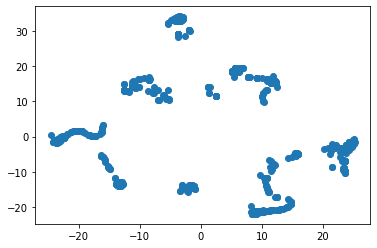

In [21]:
# Scatter plot to check for clusters
plt.scatter(pca_crypto_df['x'], pca_crypto_df['y'])
plt.show()

Cluster Analysis with K-Means

C:\Users\cchic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


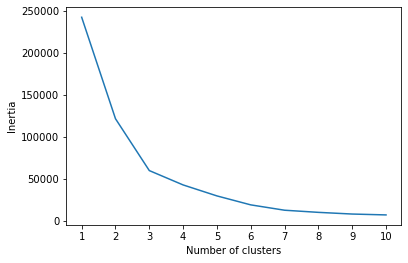

In [22]:
# Create an elbow plot with K-Means and determine inertia with for loop
inertia = []

k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_crypto_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Findings: Based on my findings the cryptocurrencies can only be loosely clustered together. Looking at the scatter plot with pca and tsne, there are 7 loose clusters of curriencies. This appears to be supported by the K-means elbow plot as the elbow levels off around 7.  